In [24]:

import json
import matplotlib.pyplot as plt
import numpy as np

from from_root import from_root

In [25]:
#output_dir_path = str(from_root()) + "/data_distilled_object_detection/output/backup"
#ANNOTATIONS_TYPE = "annotations_unfiltered"
#experiment_folder1 = f'{output_dir_path}/{ANNOTATIONS_TYPE}_240'
#experiment_folder2 = f'{output_dir_path}/distill_on_{ANNOTATIONS_TYPE}_240_720_online'
#experiment_folder3 = f'{output_dir_path}/distill_on_{ANNOTATIONS_TYPE}_240_720_multi_batch'

#experiment_folder1 = f'{output_dir_path}/distill_on_annotations_filtered_240_720_multi_batch'
#experiment_folder2 = f'{output_dir_path}/distill_on_annotations_unfiltered_240_720_multi_batch'

#experiment_folder1 = f'data_distilled_object_detection/output/backup/distill_on_annotations_filtered_80_160_online'
#experiment_folder2 = f'data_distilled_object_detection/output/backupdistill_on_annotations_filtered_80_100_online'

experiment_folder1 = "/home/ruby/PycharmProjects/apple-detection/data_distilled_object_detection/output/distill_on_annotations_filtered_80_160_online"
experiment_folder2 = "/home/ruby/PycharmProjects/apple-detection/data_distilled_object_detection/output/distill_on_annotations_filtered_80_160_online"


#experiment_folder1 = "/home/ruby/PycharmProjects/apple-detection/data_distilled_object_detection/data_distilled_object_detection/output/annotations_filtered_80"
#experiment_folder2 = "/home/ruby/PycharmProjects/apple-detection/data_distilled_object_detection/data_distilled_object_detection/output/annotations_filtered_80"

In [26]:
LEGEND = []
## Utils ##
def load_json_arr(json_path):
    lines = []
    with open(json_path, 'r') as f:
        for line in f:
            lines.append(json.loads(line))
    return lines

In [27]:
def retrieve_ap_scores(output_dir):
  experiment_metrics = load_json_arr(output_dir + '/metrics.json')
  ap50_scores = []
  ap75_scores = []
  iterations = []
  for x in experiment_metrics:
    try:
      ap50_scores.append(x['bbox/AP50'])
      ap75_scores.append(x['bbox/AP75'])
      iterations.append(x['iteration'])
    except:
      continue
  ap50_scores = np.array(ap50_scores)
  ap50_scores[np.isnan(ap50_scores)] = 0
  ap75_scores = np.array(ap75_scores)
  ap75_scores[np.isnan(ap75_scores)] = 0
  return ap50_scores, ap75_scores, iterations

In [28]:
def plot_degradation_point():
  ax.plot(iterations1[2], ap50_scores1[2], 'o',
          ms=10 * 2, mec='y', mfc='y', mew=2, alpha=0.4)
  ax.plot(iterations1[5], ap50_scores1[5], 'o',
          ms=10 * 2, mec='y', mfc='y', mew=2, alpha=0.4)
  ax.annotate('Degradation Points', xy=[iterations1[2], ap50_scores1[2]], xytext=(20, 10),
              textcoords='offset points',
              color='y', size='large',
              arrowprops=dict(
                  arrowstyle='simple,tail_width=0.2,head_width=0.5,head_length=0.8',
                  facecolor='y', shrinkB=5 * 1.2)
  )
  ax.annotate('', xy=[iterations1[5], ap50_scores1[5]], xytext=(-30, -10),
              textcoords='offset points',
              color='w', size='large',
              arrowprops=dict(
                  arrowstyle='simple,tail_width=0.2,head_width=0.5,head_length=0.8',
                  facecolor='y', shrinkB=5 * 1.2)
  )

In [29]:
def print_last_results():
  print(f"Best AP50 score on fully supervised run: {max(ap50_scores1)}")
  print(f"Best AP75 score on fully supervised run: {max(ap75_scores1)}")
  print(f"Best AP50 score on data distilled run(online): {max(ap50_scores2)}")
  print(f"Best AP75 score on data distilled run(online): {max(ap75_scores2)}")
  #print(f"Last AP50 score on data distilled run(multi-batch): {max(ap50_scores3)}")
  #print(f"Last AP75 score on data distilled run(multi-batch): {max(ap75_scores3)}")

In [30]:
def plot_ap50(draw_max_lines = True):
  global LEGEND
  plt.plot(iterations1, ap50_scores1, '-o')
  plt.plot(iterations2, ap50_scores2, '-o')
  #plt.plot(iterations3, ap50_scores3, '-o')
  if draw_max_lines:
    plt.hlines(max(ap50_scores1), xmin = 0, xmax = iterations1[np.argmax(ap50_scores1)], linestyles='dashed', label='_nolegend_')
    plt.hlines(max(ap50_scores2), xmin = 0, xmax = iterations2[np.argmax(ap50_scores2)], linestyles='dashed', label='_nolegend_')
    #plt.hlines(max(ap50_scores3), xmin = 0, xmax = iterations3[np.argmax(ap50_scores3)], linestyles='dashed', label='_nolegend_')
  LEGEND += ['AP50 - Fully Supervised', 'AP50 - Data Distillation Online', 'AP50 - Data Distillation Multi-Batch']

In [9]:
def plot_ap75(draw_max_lines = True):
  global LEGEND
  plt.plot(iterations1, ap75_scores1, '-o')
  plt.plot(iterations2, ap75_scores2, '-o')
  #plt.plot(iterations3, ap75_scores3, '-o')

  if draw_max_lines:
    plt.hlines(max(ap75_scores1), xmin = 0, xmax = iterations1[np.argmax(ap50_scores1)], linestyles='dashed', label='_nolegend_')
    plt.hlines(max(ap75_scores2), xmin = 0, xmax = iterations2[np.argmax(ap50_scores2)], linestyles='dashed', label='_nolegend_')
    #plt.hlines(max(ap75_scores3), xmin = 0, xmax = iterations3[np.argmax(ap50_scores3)], linestyles='dashed', label='_nolegend_')
  LEGEND += ['AP75 - Fully Supervised', 'AP75 - Data Distillation Online', 'AP75 - Data Distillation Multi-Batch']

In [10]:
def plot_dataset_comparison(draw_max_lines = True):
  global LEGEND
  plt.plot(iterations1, ap50_scores1, '-o')
  plt.plot(iterations2, ap50_scores2, '-o')
  plt.plot(iterations1, ap75_scores1, '-o')
  plt.plot(iterations2, ap75_scores2, '-o')
  if draw_max_lines:
    plt.hlines(max(ap50_scores1), xmin = 0, xmax = iterations1[np.argmax(ap50_scores1)], linestyles='dashed', label='_nolegend_')
    plt.hlines(max(ap50_scores2), xmin = 0, xmax = iterations2[np.argmax(ap50_scores2)], linestyles='dashed', label='_nolegend_')
  LEGEND += ['AP50 - Filtered', 'AP50 - Unfiltered', 'AP75 - Filtered', 'AP75 - Unfiltered']

In [31]:
ap50_scores1, ap75_scores1, iterations1 = retrieve_ap_scores(experiment_folder1)
#ap50_scores2, ap75_scores2, iterations2 = retrieve_ap_scores(experiment_folder2)
#ap50_scores3, ap75_scores3, iterations3 = retrieve_ap_scores(experiment_folder3)

Best AP50 score on fully supervised run: 71.7757074197478
Best AP75 score on fully supervised run: 60.954391934067075
Best AP50 score on data distilled run(online): 71.7757074197478
Best AP75 score on data distilled run(online): 60.954391934067075


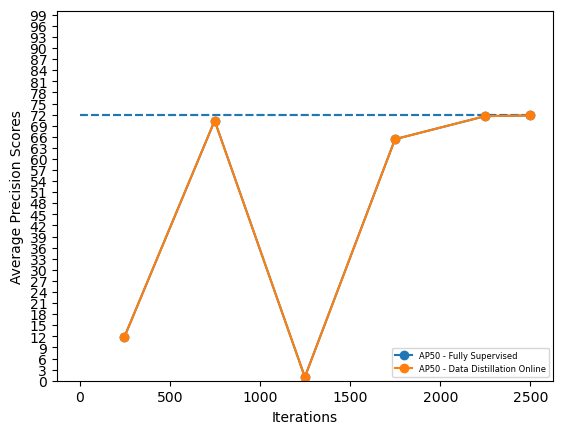

In [32]:
ax = plt.gca()

#plt.yticks(np.arange(55, 100, 3))
#ax.set_ylim([55, 100])
plt.yticks(np.arange(0, 100, 3))
ax.set_ylim([0, 100])
#plot_dataset_comparison(True)
plt.xlabel('Iterations')
plt.ylabel('Average Precision Scores')
plot_ap50(True)
#plot_ap75(False)

print_last_results()

plt.legend(LEGEND, loc='lower right', prop={'size': 6})
plt.show()